In [1]:
from ib_async import *
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
import yfinance as yf
from broker.connection import connect_to_IB
from broker.riskmanager import RiskManager
from data_and_research import ac
import broker.utilityfunctions as uf

Connected to ArcticDB at ../db


In [2]:
ib = connect_to_IB(clientid=88)
ib.reqMarketDataType(4)

In [3]:
rm = RiskManager(ib)

In [4]:
rm.analyze_sector_exposure()

Stock(symbol='AAPL', exchange='SMART', currency='USD')
Electronic technology
Stock(symbol='SIE', exchange='SMART', currency='EUR')
DE0007236101
SIE.DE
Industrials
Stock(symbol='VOW', exchange='SMART', currency='EUR')
DE0007664005
VOW.DE
Consumer Cyclical
Stock(symbol='VT', exchange='SMART', currency='USD')
Global Large-Stock Blend


Error 430, reqId 5: F\u00fcr den angef\u00fchrten Verm\u00f6genswert stehen keine Fundamentaldaten zur Verf\u00fcgung.failed to fetch, contract: Stock(symbol='VT', exchange='SMART', currency='USD')


,Exposure (%)
Sector,
Electronic technology,98.932112
Consumer Cyclical,0.807285
Industrials,0.748221
Global Large-Stock Blend,-0.487617


In [5]:
# Get the portfolio positions
portfolio = pd.DataFrame(ib.portfolio())
portfolio['symbol'] = portfolio['contract'].apply(lambda x: x.symbol)
portfolio['asset_class'] = portfolio['contract'].apply(lambda x: type(x))
portfolio

,contract,position,marketPrice,marketValue,averageCost,unrealizedPNL,realizedPNL,account,symbol,asset_class
0,"Stock(conId=265598, symbol='AAPL', right='0', ...",107.0,226.460007,24231.22,225.392407,114.23,0.0,DU3180649,AAPL,<class 'ib_async.contract.Stock'>
1,"Stock(conId=14217, symbol='SIE', right='0', pr...",1.0,183.259995,183.26,171.920000,11.34,0.0,DU3180649,SIE,<class 'ib_async.contract.Stock'>
2,"Stock(conId=14232, symbol='VOW', right='0', pr...",2.0,98.863197,197.73,104.575000,-11.42,0.0,DU3180649,VOW,<class 'ib_async.contract.Stock'>
3,"Stock(conId=52197301, symbol='VT', right='0', ...",-1.0,119.431000,-119.43,117.676500,-1.75,0.0,DU3180649,VT,<class 'ib_async.contract.Stock'>


In [6]:
lib =ac.get_library('univ')
lib.list_symbols()
uni = lib.read('us_equities').data

In [7]:
import xml.etree.ElementTree as ET

In [8]:
def get_isin_from_contract(contract):
    import xml.etree.ElementTree as ET
    fundamentals = ib.reqFundamentalData(contract, reportType='ReportSnapshot')
    root = ET.fromstring(fundamentals)
    for elem in root.iter():
        prev_elem = None
        for elem in root.iter():
            if prev_elem is not None:
                if prev_elem.text == contract.symbol:
                    isin = elem.text
                    return isin
            prev_elem = elem

def get_sector_from_yf(contract):
    try:
        isin = get_isin_from_contract(contract)
        ticker =yf.utils.get_ticker_by_isin(isin)
        sector = yf.Ticker(ticker).info['sector']
        return sector
    except:
        try:
            sector = yf.Ticker(contract.symbol).info['category']
        except:
            ticker =yf.utils.get_ticker_by_isin(isin)
            sector = yf.Ticker(contract.symbol).info['category']
        return sector
        
def get_sector_from_uni(contract):
    try:
        sector = uni[uni.Symbol==contract.symbol].Sector.values[0]
        return sector
    except:
        return None

In [9]:


for contract in portfolio[portfolio['asset_class'] == Stock]['contract']:
    contract = Stock(contract.symbol, 'SMART', contract.currency)

    sector = ''
    sector = get_sector_from_uni(contract) 
    if not sector:
        sector = get_sector_from_yf(contract)
    print(sector)
    #         try:
                
    #         ticker =yf.utils.get_ticker_by_isin(isin)
    #         try:
    #             sector = yf.Ticker(ticker).info['sector']
    #         except:
    #             pass
    #             # print(f"{contract.symbol} has no sector data in Yahoo Finance.")
    #     except:
    #         # print(f"{contract.symbol} has no fundamental data or isin retrieval failed.")
    #         sector = yf.Ticker(contract.symbol).info['category']
    # print(sector)


Electronic technology
Industrials
Consumer Cyclical
Global Large-Stock Blend


Error 430, reqId 6: F\u00fcr den angef\u00fchrten Verm\u00f6genswert stehen keine Fundamentaldaten zur Verf\u00fcgung.failed to fetch, contract: Stock(symbol='VT', exchange='SMART', currency='USD')


In [ ]:
for elem in root.iter():
    prev_elem = None
    for elem in root.iter():
        if prev_elem.text is contract.symbol:
            print(f"Previous: {elem.tag}, {elem.text}")
        prev_elem = elem

TypeError: unsupported operand type(s) for -: 'xml.etree.ElementTree.Element' and 'int'

In [ ]:
ac.list_libraries()

['general',
 'jobs',
 'pnl',
 'portfolio',
 'spx500',
 'stocks',
 'univ',
 'universe',
 'us_equities',
 'us_sectors']

In [ ]:

# if "AAPL" in lib.list_symbols():
#     df = lib.read("AAPL").data
#     df.head()

['us_equities']

In [ ]:
uni[uni.Symbol=='AAPL'].Sector.values[0]

'Electronic technology'

In [ ]:
contract = Stock('AAPL', 'SMART', 'USD')

fundamentals = ib.reqFundamentalData(contract,reportType='ReportSnapshot')


In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
# Parse the fundamental data XML
root = ET.fromstring(fundamentals)
# Extract the sector information (assuming it's in the XML structure)
sector = None
for elem in root.iter():
    print(elem.text)
    if elem.tag == '1':  # This tag may vary based on the report type
        sector = elem.text
        break


	

		
05680
Apple Inc
942404110
0000320193
4295905573

		

			
Ordinary Shares
AAPL
AAPL.O
AAPL.OQ
331724
7645713
8590932301
55835312773
NASDAQ
OSR
4.0

			
Preference Shares
100112850
21482886553
Not Available

		
Active
Equity Issue
2024-09-30
2023-09-30
2024-06-29
161000
15204137000.0
U.S. Dollars
1.0

		
Apple Inc. designs, manufactures and markets smartphones, personal computers, tablets, wearables and accessories, and sells a variety of related services. Its product categories include iPhone, Mac, iPad, and Wearables, Home and Accessories. Its software platforms include iOS, iPadOS, macOS, watchOS, and tvOS. Its services include advertising, AppleCare, cloud services, digital content and payment services. It operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games and podcasts. It also offers digital content through subscription-based services, including Apple Arcade, A

In [ ]:
sector

'\n\t'

In [ ]:
cons = [c.contract for c in ib.portfolio()]
cons

[Stock(conId=265598, symbol='AAPL', right='0', primaryExchange='ISLAND', currency='USD', localSymbol='AAPL', tradingClass='NMS'),
 Stock(conId=14217, symbol='SIE', right='0', primaryExchange='IBIS', currency='EUR', localSymbol='SIE', tradingClass='XETRA'),
 Stock(conId=14232, symbol='VOW', right='0', primaryExchange='IBIS', currency='EUR', localSymbol='VOW', tradingClass='XETRA'),
 Stock(conId=52197301, symbol='VT', right='0', primaryExchange='ARCA', currency='USD', localSymbol='VT', tradingClass='VT')]

In [ ]:
type(cons[0])
isinstance(cons[0], Option)

False

In [ ]:
# Function to create a proper contract from the given format
def create_contract_from_cons(con_data):
    if isinstance(con_data, Stock):
        return Stock(symbol=con_data.symbol,exchange='SMART', currency=con_data.currency)
    elif isinstance(con_data, Future):
        return Future(symbol=con_data.symbol,exchange='SMART', currency=con_data.currency)
    # elif isinstance(con_data, Option):
    #     return Option(symbol=con_data.symbol,exchange='SMART', currency=con_data.currency)
    else:
        raise ValueError(f"Unsupported contract type: {type(con_data)}")

# Create a proper contract for the first item in cons
if cons:
    contract = create_contract_from_cons(cons[0])

    # Get historical data for the contract
    bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 Y',
        barSizeSetting='1 day',
        whatToShow='ADJUSTED_LAST',
        useRTH=True
    )

    # Convert to DataFrame if needed
    df = pd.DataFrame(bars)
else:
    print("No contracts found in the portfolio.")

bars

[BarData(date=datetime.date(2023, 10, 6), open=173.01, high=177.08, low=172.3, close=176.59, volume=402657.15, average=175.26316433852844, barCount=191735),
 BarData(date=datetime.date(2023, 10, 9), open=175.9, high=178.14, low=174.9, close=178.08, volume=310028.93, average=176.817212151294, barCount=138548),
 BarData(date=datetime.date(2023, 10, 10), open=177.19, high=178.81, low=177.04, close=177.48, volume=310738.17, average=177.82803966587133, barCount=154357),
 BarData(date=datetime.date(2023, 10, 11), open=177.34, high=178.93, low=176.7, close=178.88, volume=322634.09, average=177.8549022080894, barCount=154291),
 BarData(date=datetime.date(2023, 10, 12), open=179.15, high=181.41, low=178.13, close=179.79, volume=423744.0, average=180.07354921351018, barCount=201107),
 BarData(date=datetime.date(2023, 10, 13), open=180.47, high=181.0, low=177.23, close=177.94, volume=345271.71, average=178.58815011974642, barCount=160537),
 BarData(date=datetime.date(2023, 10, 16), open=175.86, h

Successfully processed AAPL
Successfully processed SIE
Successfully processed VOW
Successfully processed VT
Portfolio Analysis:
  symbol  position  marketValue  % of Portfolio  Equity-like (SPY)  \
0   AAPL     107.0     24231.22       98.932093           0.560666   
1    SIE       1.0       183.26        0.748220           0.006570   
2    VOW       2.0       197.73        0.807299           0.097089   
3     VT      -1.0      -119.43       -0.487613          -0.961453   

   Bond-like (TLT)    Character  
0         0.131132  Equity-like  
1         0.012930    Bond-like  
2         0.000383  Equity-like  
3        -0.201690  Equity-like  

Concentration by Character:
Character
Bond-like       0.74822
Equity-like    99.25178
Name: % of Portfolio, dtype: float64


/Users/johanneslange/miniconda3/lib/python3.11/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


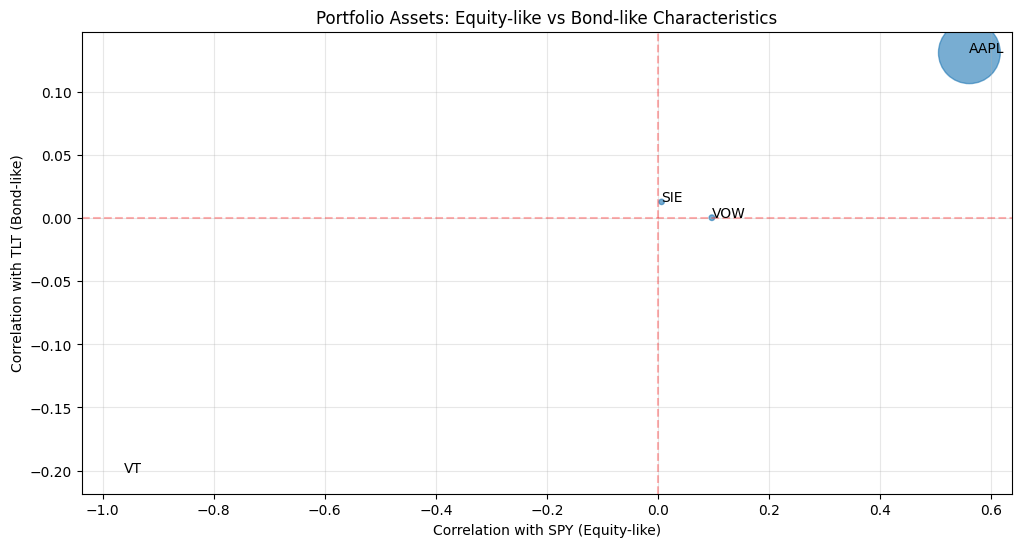

In [ ]:
def create_contract_from_cons(con_data):
    if isinstance(con_data, Stock):
        return Stock(symbol=con_data.symbol,exchange='SMART', currency=con_data.currency)
    elif isinstance(con_data, Future):
        return Future(symbol=con_data.symbol,exchange='SMART', currency=con_data.currency)
    # elif isinstance(con_data, Option):
    #     return Option(symbol=con_data.symbol,exchange='SMART', currency=con_data.currency)
    else:
        raise ValueError(f"Unsupported contract type: {type(con_data)}")
    
# Function to get historical data for a given contract
def get_historical_data(ib, contract, duration='1 Y', bar_size='1 day'):
    bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr=duration,
        barSizeSetting=bar_size,
        whatToShow='ADJUSTED_LAST',
        useRTH=True
    )
    return pd.DataFrame(bars)

# Get historical data for SPY and TLT
spy = Stock('SPY', 'SMART', 'USD')
tlt = Stock('TLT', 'SMART', 'USD')

spy_data = get_historical_data(ib, spy)
tlt_data = get_historical_data(ib, tlt)

# Calculate returns for SPY and TLT
spy_returns = spy_data['close'].pct_change().dropna()
tlt_returns = tlt_data['close'].pct_change().dropna()

# Dictionary to store correlations
correlations = {}

# Get the portfolio positions
portfolio = pd.DataFrame(ib.portfolio())
portfolio['symbol'] = portfolio['contract'].apply(lambda x: x.symbol)

# Get historical data and calculate correlations for each contract in the portfolio
for con in cons:
    try:
        contract = create_contract_from_cons(con)
        hist_data = get_historical_data(ib, contract)
        returns = hist_data['close'].pct_change().dropna()
        
        # Align dates
        aligned_data = pd.concat([returns, spy_returns, tlt_returns], axis=1, join='inner')
        aligned_data.columns = ['asset', 'SPY', 'TLT']
        
        # Calculate correlations
        corr_spy = aligned_data['asset'].corr(aligned_data['SPY'])
        corr_tlt = aligned_data['asset'].corr(aligned_data['TLT'])

        # Get the position sign (1 for long, -1 for short)
        position_sign = np.sign(portfolio[portfolio['symbol'] == contract.symbol]['position'].values[0])
        
        correlations[contract.symbol] = {'SPY': corr_spy * position_sign, 'TLT': corr_tlt * position_sign }
        print(f"Successfully processed {contract.symbol}")
    except Exception as e:
        print(f"Error processing {contract.symbol}: {str(e)}")

# Check if correlations dictionary is empty
if not correlations:
    print("No correlations were calculated. Check the contracts and data availability.")
else:
    # Create a DataFrame from the correlations
    corr_df = pd.DataFrame(correlations).T
    corr_df.columns = ['Equity-like (SPY)', 'Bond-like (TLT)']

    # Calculate the character of each asset
    corr_df['Character'] = np.where(corr_df['Equity-like (SPY)'].abs() > corr_df['Bond-like (TLT)'].abs(), 'Equity-like', 'Bond-like')

    # Merge correlations with portfolio data
    portfolio_analysis = portfolio.merge(corr_df, left_on='symbol', right_index=True, how='left')

    # Calculate the total market value
    total_market_value = portfolio_analysis['marketValue'].sum()

    # Calculate the percentage of portfolio for each position
    portfolio_analysis['% of Portfolio'] = portfolio_analysis['marketValue'] / total_market_value * 100

    # Calculate concentration by character
    concentration = portfolio_analysis.groupby('Character')['% of Portfolio'].sum()

    print("Portfolio Analysis:")
    print(portfolio_analysis[['symbol', 'position', 'marketValue', '% of Portfolio', 'Equity-like (SPY)', 'Bond-like (TLT)', 'Character']])
    print("\nConcentration by Character:")
    print(concentration)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(corr_df['Equity-like (SPY)'], corr_df['Bond-like (TLT)'], s=portfolio_analysis['% of Portfolio']*20, alpha=0.6)
for idx, row in corr_df.iterrows():
    plt.annotate(idx, (row['Equity-like (SPY)'], row['Bond-like (TLT)']))
plt.xlabel('Correlation with SPY (Equity-like)')
plt.ylabel('Correlation with TLT (Bond-like)')
plt.title('Portfolio Assets: Equity-like vs Bond-like Characteristics')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.show()




In [ ]:
portfolio.iloc[0].contract.symbol

'AAPL'